<a href="https://colab.research.google.com/github/savaralajyoshna/COVID-19-and-Employee-Burnout-A-Data-driven-Analysis/blob/main/COVID_19_and_Employee_Burnout_A_Data_driven_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **OVERVIEW**

Analyzing the Impact of COVID-19 on IT Sector Employees: A Study of Work-from-Home, Productivity, and Burnout

In this project, we aim to examine the unprecedented effects of the COVID-19 pandemic on the global workforce. While the pandemic has significantly influenced various sectors, the IT sector and white-collar employees have experienced comparatively fewer disruptions in terms of expected outcomes. Interestingly, numerous articles and LinkedIn comments suggest that the shift to remote work has led to increased productivity for organizations. However, this transition has also raised concerns regarding burnout and mental stress, with individuals blaming the work-from-home (WFH) setup for blurring the boundaries between personal and professional life.

To shed light on this phenomenon, we will conduct a comprehensive analysis using openly available data from Kaggle. By leveraging this dataset, we will explore the relationships between the pandemic, the IT sector, WFH arrangements, productivity levels, and burnout. Our study aims to uncover valuable insights into the intricate dynamics of remote work and its impact on employee well-being.

Through statistical analysis, data visualization, and predictive modeling techniques, we will delve into the available data to gain a deeper understanding of the consequences of the pandemic on IT sector employees. By examining variables such as employee demographics, WFH availability, productivity levels, and burnout rates, we strive to elucidate the interplay between these factors and provide evidence-based insights for organizations and employees alike.

## **Expected Outcome:**

The goal of this project is to analyze the available data and categorize employees based on their burnout levels. Here's an overview of the revised expected outcome:

1. **Setup Development Environment:** Set up the development environment using tools like Google Colab and necessary Python libraries.

2. **Download Data**: Utilize the opendatasets library developed by Jovian to download the available data from the source.

3. **Perform Data Visualizations and Statistics:** Explore and analyze the training data through visualizations and statistical techniques. Gain insights into the distribution and relationships between variables.

4. **Categorize Burnout Levels:** Instead of predicting the burnout rate, categorize employees into different burnout levels based on the provided data. Modify the categorization criteria as follows:
   - Extremely burned out: Employees with a burn rate of 0.7 or higher.
   - Moderately burned out: Employees with a burn rate between 0.5 and 0.7.
   - Slightly burned out: Employees with a burn rate less than 0.5.
   - Not burned out: Employees with a burn rate of 0.0.

5. **Build a Model for Categorization:** Develop a classification model using suitable machine learning algorithms to categorize employees into the defined burnout levels. Train the model using the labeled training data.

6. **Model Evaluation:** Evaluate the performance of the classification model using appropriate evaluation metrics such as accuracy, precision, recall, and F1-score. Assess the model's ability to accurately categorize employees into their respective burnout levels.

7. **Predict Burnout Levels:** Utilize the trained model to predict the burnout levels for unseen or test data. Categorize employees into the defined burnout levels based on their predicted burnout rates.

By categorizing employees into different burnout levels this project aims to provide a more actionable and practical understanding of employee burnout. It allows for better identification and targeted interventions for employees experiencing different levels of burnout.

# Install libraries needed for development environment setup and import them

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_theme(style = "darkgrid")
sns.set_context("paper")
plt.figure(figsize=(8,6))

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

<Figure size 800x600 with 0 Axes>

## **Load train.csv into pandas**

In [4]:
from google.colab import files
files=files.upload()

Saving train.csv to train.csv


In [5]:
raw_employee_df = pd.read_csv("train.csv")
print(raw_employee_df)

                    Employee ID Date of Joining  Gender Company Type WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  Burn Rate
0      fffe32003000360033003200      2008-09-30  Female      Service                  No          2.0                  3.0                   3.8       0.16
1          fffe3700360033003500      2008-11-30    Male      Service                 Yes          1.0                  2.0                   5.0       0.36
2      fffe31003300320037003900      2008-03-10  Female      Product                 Yes          2.0                  NaN                   5.8       0.49
3      fffe32003400380032003900      2008-11-03    Male      Service                 Yes          1.0                  1.0                   2.6       0.20
4      fffe31003900340031003600      2008-07-24  Female      Service                  No          3.0                  7.0                   6.9       0.52
...                         ...             ...     ...         

## **Get basic stats on the data we have**

In [6]:
raw_employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


As shown in the output, we can see we have -

22750 records in the dataset

There are missing values for Resource allocation, mental fatigue score and burn rate

Type of data is object(string) and float

Burn rate is the target label and is to be predicted

In [7]:
raw_employee_df.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


Based on the output shown above, we have following inferences -

More that 75% of our records have designation of 3 (5 being highest)

More than 75% of our records have resource allocation value of 6 (10 being highest)

Same with Mental Fatigure score

While all features will have an impact on the burn out rate, there will be critical features like Mental Fatigue score, resource allocation, gender which might impact the burn out rate.

Let us try to visualize a few relations

## **Visualization of data**

Count plots

Let us plot a count plot to understand the number of records or samples we have for each column of interest

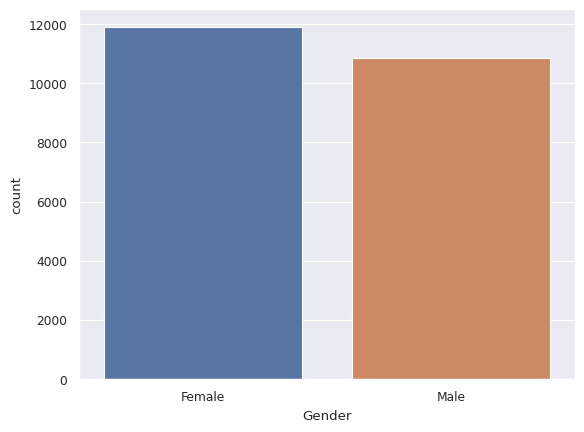

In [8]:
sns.countplot(x = "Gender", data = raw_employee_df);

Let us plot countplot for other categorical columns, i.e., Company Type, WFH Setup Available

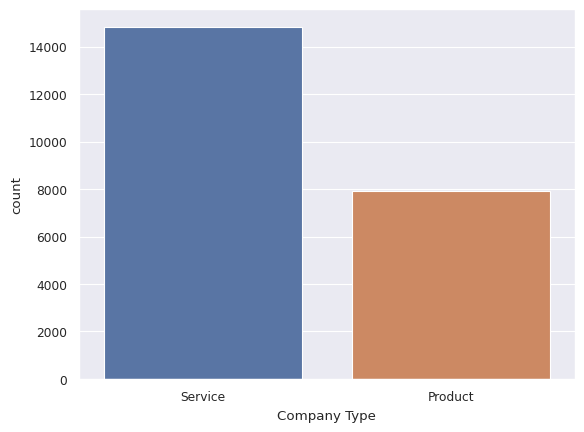

In [9]:
sns.countplot(x = "Company Type", data = raw_employee_df);

We can see that almost double the employees work in a service based company. This could really impact our analysis


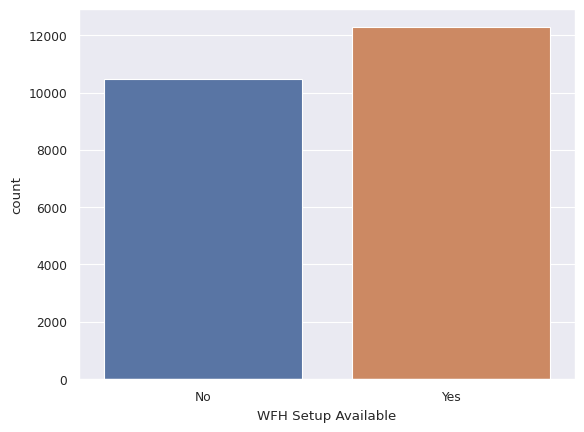

In [10]:
sns.countplot(x = "WFH Setup Available", data = raw_employee_df);

Work from home setup is available for almost 12 K employee in our records

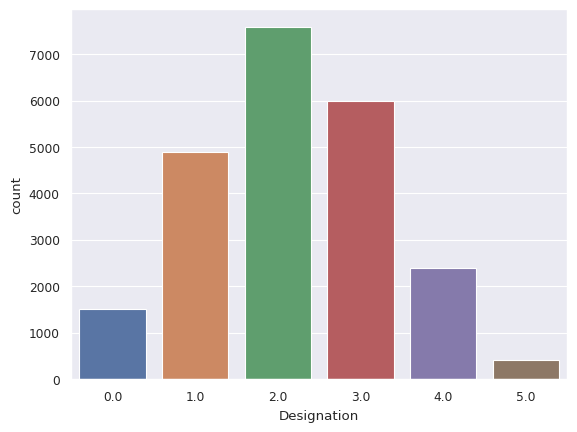

In [11]:
sns.countplot(x = "Designation", data = raw_employee_df);

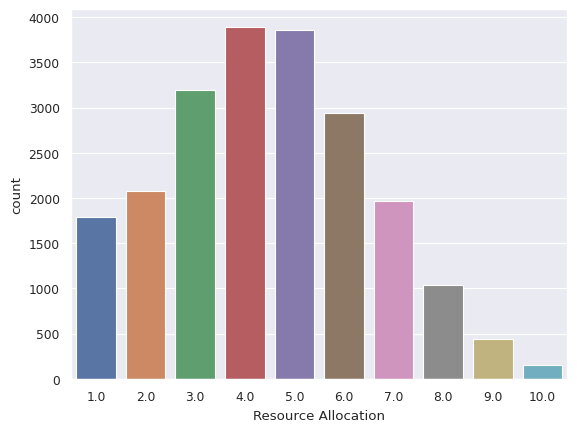

In [12]:
sns.countplot(x = "Resource Allocation", data = raw_employee_df);

## **Relational plots**
Relational plots will help us understand how two features are impacting each other

In [13]:
print(raw_employee_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB
None


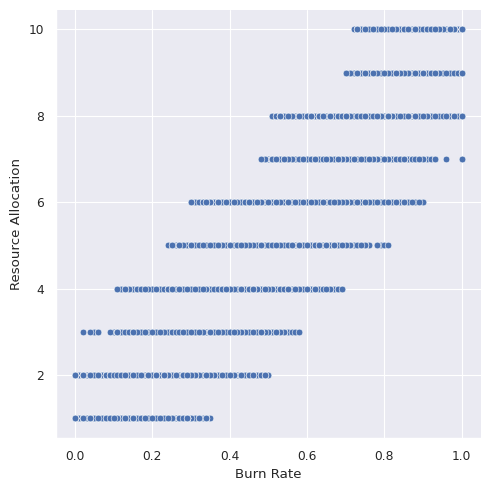

In [14]:
sns.relplot(x = "Burn Rate", y = "Resource Allocation", data = raw_employee_df) ;

from the graph above, we can see that burn out rate is much more (greater than 0.6) where number of resources allocated is more than 8. With this we infer -

**Number of resources allocated to an employee impacts the burn our. If employee is allocated with more resources, his/her burn out rate will be much more compared to others**

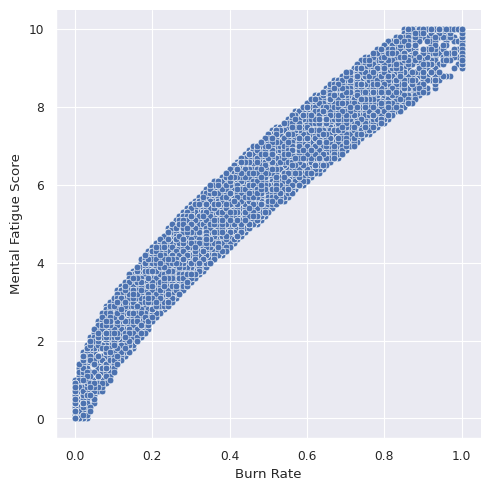

In [15]:
sns.relplot(x = "Burn Rate", y = "Mental Fatigue Score", data = raw_employee_df) ;

The above relation graph clearly shows that Mental Fatigue score is a major feature impacting the burn out. We infer -

Burn rate increases with Mental Fatigue score.They are too inter-related

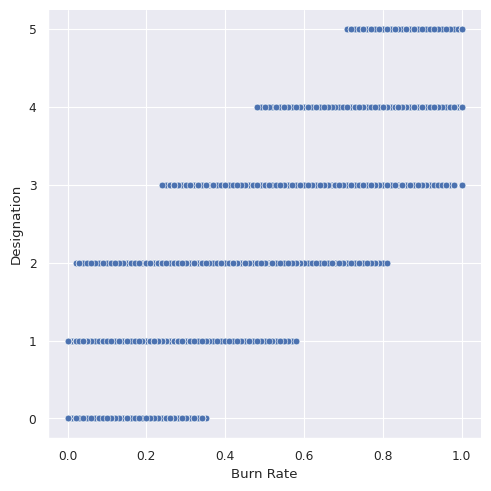

In [16]:
sns.relplot(x = "Burn Rate", y = "Designation", data = raw_employee_df) ;

Designation does not really seem to have a major impact in the burn-outs

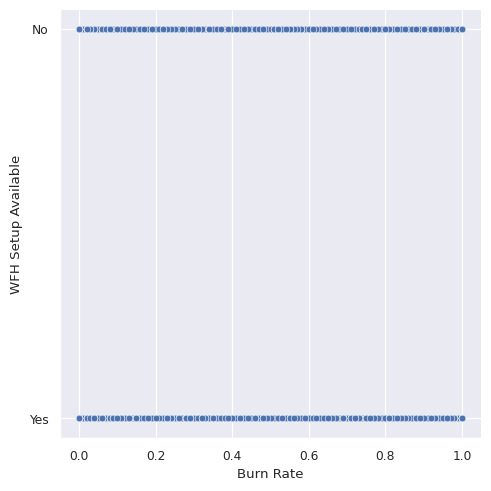

In [17]:
sns.relplot(x = "Burn Rate", y = "WFH Setup Available", data = raw_employee_df) ;

This feature does not seem to impact the burn-out in any sense

### **Correlation matrix**
Let us get the correlation matrix to identify which features are impacting each other. Correlation matrix only works on numerical data and hence will rule out all categorical columns.

We can get the correlation with categorical columns later by some encoding techniques

In [18]:
raw_employee_df.corr()

<ipython-input-18-26c82dd53391>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  raw_employee_df.corr()


,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.878459,0.690983,0.737556
Resource Allocation,0.878459,1.000000,0.799662,0.856278
Mental Fatigue Score,0.690983,0.799662,1.000000,0.944546
Burn Rate,0.737556,0.856278,0.944546,1.000000


<ipython-input-19-b9eb425f47ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_employee_df.corr(), annot=True);


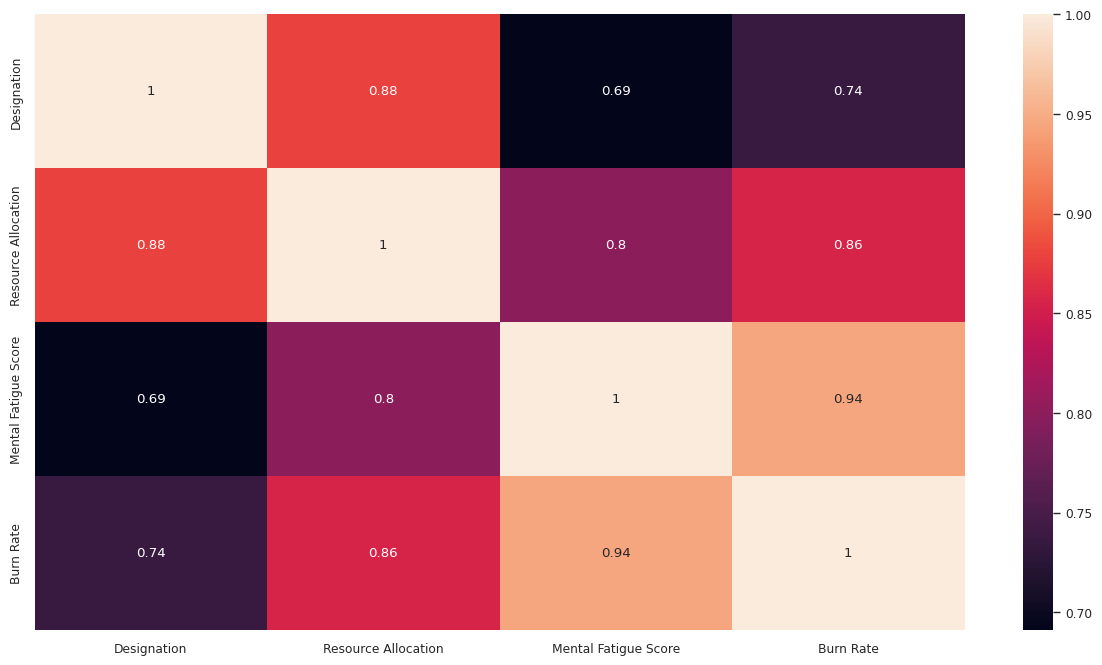

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(raw_employee_df.corr(), annot=True);

We can clearly see that Mental Fatigue score and burn rate are directly impacting each other. There are some other good correlations between Resource allocation, burn rate, designation and resource allocation, etc.

## **Answer statistical questions below from the data**
**Questions**

How many employees are extreamly burned out (having burn rate greater than 7.0?

How many males and females are extreamly burned out (having burn rate greater than 7.0)?

Get the count of employee burn out in product and service based companies (having burn rate greater than 7.0?)

Are product based company employees more burned out ?

Who is more burned out - Junior(1), intermediate(2,3) or seniors(4,5) ?
Let us try to get these stats


**How many employees are burned out in the following categories ?**
Extreamly burned out = Burn Rate >= 0.7

Moderately burned out = Burn Rate between 0.5 and 0.7

Slightly burned out = Burn Rate less than 0.5

Not burned out = Burn Rate = 0.0

In [20]:
#How many employees are extreamly burned out (having burn rate greater than 0.7 ?
extream_burn_rate_df = raw_employee_df[raw_employee_df["Burn Rate"] >= 0.7]
extreamly_burned_out_count = extream_burn_rate_df["Burn Rate"].count()
print("Number of employees who are extreamly burned out =", extreamly_burned_out_count)

percent = extreamly_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Extreamly burned out = " , percent * 100, " %")

Number of employees who are extreamly burned out = 2403
Percentage of exmployees who fall under Extreamly burned out =  10.562637362637362  %


In [21]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
moderate_burn_rate_df = raw_employee_df[(raw_employee_df["Burn Rate"] >= 0.5) & (raw_employee_df["Burn Rate"] < 0.7)]
moderately_burned_out_count = moderate_burn_rate_df["Burn Rate"].count()
print("Number of employees who are moderately burned out =", moderately_burned_out_count)

percent = moderately_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Moderately burned out = " , percent * 100, " %")

Number of employees who are moderately burned out = 6625
Percentage of exmployees who fall under Moderately burned out =  29.120879120879124  %


In [22]:
#How many employees are moderately burned out (having burn rate greater than 0.5 and less thatn 0.7) ?
slightly_burn_rate_df = raw_employee_df[(raw_employee_df["Burn Rate"] > 0.0) & (raw_employee_df["Burn Rate"] < 0.5)]
slightly_burned_out_count = slightly_burn_rate_df["Burn Rate"].count()
print("Number of employees who are slightly burned out =", slightly_burned_out_count)

percent = slightly_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under Slightly burned out = " , percent * 100, " %")

Number of employees who are slightly burned out = 12326
Percentage of exmployees who fall under Slightly burned out =  54.18021978021979  %


In [23]:
#How many employees are not burned out at all ?
no_burn_rate_df = raw_employee_df[raw_employee_df["Burn Rate"] == 0]
no_burned_out_count = no_burn_rate_df["Burn Rate"].count()
print("Number of employees who are not burned out =", no_burned_out_count)

percent = no_burned_out_count / len(raw_employee_df)
print("Percentage of exmployees who fall under No burned out = " , percent * 100, " %")

Number of employees who are not burned out = 272
Percentage of exmployees who fall under No burned out =  1.1956043956043956  %


# Gender wise count of burned out in the following categories
Extreamly burned out = Burn Rate >= 0.7

Moderately burned out = Burn Rate between 0.5 and 0.7

Slightly burned out = Burn Rate less than 0.5

Not burned out = Burn Rate = 0.0

**Let us add a new column "Burnout Category" with following conditions -**

Extreme Burn out when Burn Rate > 0.7

Moderate Burn out when Burn Rate >= 0.5 and burn Rate < 0.7

Slight Burn out when Burn Rate < 0.5

In [24]:
raw_employee_df['Burnout Category'] = np.where(
    raw_employee_df['Burn Rate'] > 0.7, "Extreme", #Else below
    np.where((raw_employee_df["Burn Rate"] >= 0.5) & (raw_employee_df["Burn Rate"] < 0.7), "Moderate", #else below
    np.where(raw_employee_df['Burn Rate'] < 0.5, "Slight", "No Burnout"  )))

In [25]:
males_count_extreme = raw_employee_df[(raw_employee_df['Burnout Category'] == "Extreme") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()
males_count_moderate = raw_employee_df[(raw_employee_df['Burnout Category'] == "Moderate") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()
males_count_slight = raw_employee_df[(raw_employee_df['Burnout Category'] == "Slight") & ((raw_employee_df['Gender'] == "Male"))]['Burnout Category'].count()

print("Number of males with Extreme Burnout = ", males_count_extreme)
print("Number of males with Moderate Burnout = ", males_count_moderate)
print("Number of males with Slight Burnout = ", males_count_slight)

Number of males with Extreme Burnout =  1300
Number of males with Moderate Burnout =  3865
Number of males with Slight Burnout =  4992


In [26]:
females_count_extreme = raw_employee_df[(raw_employee_df['Burnout Category'] == "Extreme") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()
females_count_moderate = raw_employee_df[(raw_employee_df['Burnout Category'] == "Moderate") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()
females_count_slight = raw_employee_df[(raw_employee_df['Burnout Category'] == "Slight") & ((raw_employee_df['Gender'] == "Female"))]['Burnout Category'].count()

print("Number of females with Extreme Burnout = ", females_count_extreme)
print("Number of females with Moderate Burnout = ", females_count_moderate)
print("Number of females with Slight Burnout = ", females_count_slight)

Number of females with Extreme Burnout =  898
Number of females with Moderate Burnout =  2760
Number of females with Slight Burnout =  7606


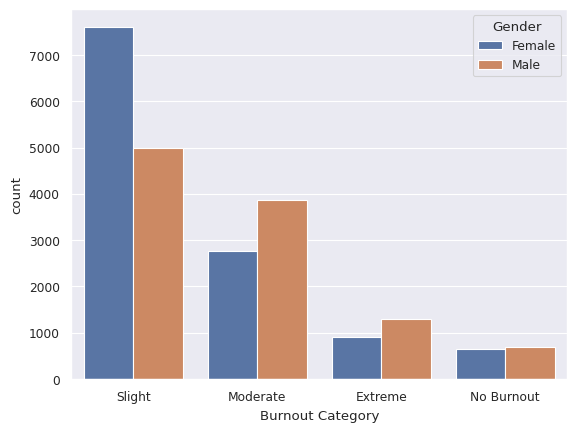

In [27]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Gender");

The above graph indicates the following -

Male count is more in Moderate and Extreme burnout and hence we can say that WFH impacted Males more than Females in terms of burn out. This conclusion even makes sense as we have more number of females records compared to male records

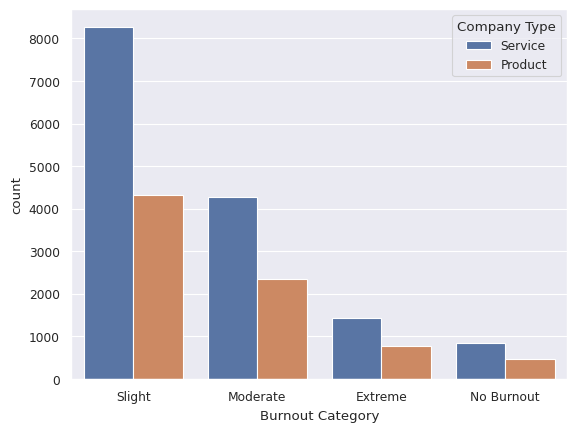

In [28]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Company Type");

The above count from the graph clearly indicates that employees working in Service based companies are more burned-out

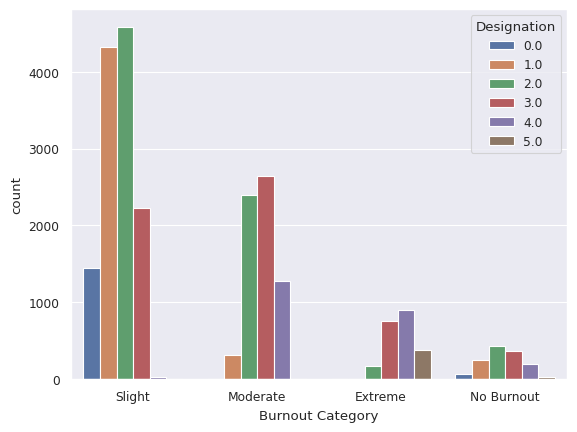

In [29]:
sns.countplot(x = "Burnout Category", data = raw_employee_df, hue = "Designation");

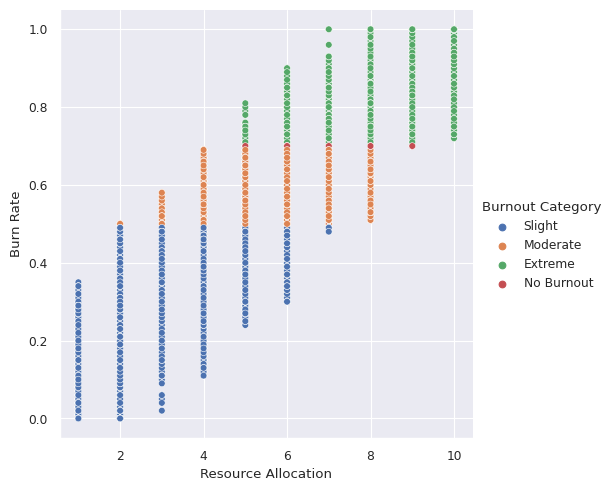

In [30]:
sns.relplot(x = "Resource Allocation", y = "Burn Rate", data = raw_employee_df, hue = "Burnout Category");

## **Based on the analysis of the data, the following conclusions can be drawn:**

**Burnout Levels:** The data indicates that 10% of the total employees are classified as extremely burned out, 29% as moderately burned out, 54% as slightly burned out, and only 1% as not burned out. These findings highlight the prevalence of burnout among the employees in the dataset.

**Gender Differences**:  The analysis reveals that 59% of males and 41% of females are classified as extremely burned out. This suggests that males experience higher levels of burnout compared to females. Furthermore, the majority of females are categorized as slightly burned out, while the majority of males are categorized as moderately and extremely burned out.

**Company Type:** The data shows that employees working in service-based companies are more burned out compared to those working in product-based companies. This indicates that the nature of the company may have an impact on the burnout levels experienced by employees, with service-based companies potentially posing higher burnout risks.


In summary, the analysis highlights the significant prevalence of burnout among employees in the dataset. It reveals gender differences in burnout levels, with males experiencing higher burnout rates compared to females. Additionally, it suggests that employees in service-based companies are more susceptible to burnout. These conclusions provide valuable insights for organizations to recognize the challenges of burnout and implement measures to support employee well-being and mitigate burnout risks.




